In [6]:
%matplotlib inline

In [13]:
import pandas as pd
import numpy as np
import sys
from pylab import *
import re
import seaborn as sns 
sys.path.append("../Titanic/")
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Loading data

In [8]:
df=pd.read_csv("train.csv")
for i in range(0,len(df)):
    if df.iloc[i,4] == "male":
        df.iat[i,4] = 1
    else:
        df.iat[i,4]=0
df["Sex"]=df["Sex"].apply(pd.to_numeric)
               
df.fillna(0,inplace=True)
df_notsurv=df[df.Survived==0]
df_surv=df[df.Survived==1]

labels=['0-9', '10-19', '20-29', '30-39', '40-49', '50-59',
        '60-69', '70-79','80-89']
df["AgeGroup"]=pd.cut(df["Age"],range(0,91,10),right=False,labels=labels)
labels2=['0-24','25-49', '50-99', '100-149', '150-199', '200-249', '250-300']
df["FareGroup"]=pd.cut(df["Fare"],[0,25]+range(50,301,50),right=False,labels=labels2)

def find_deck(cabin):
    try:
        match=re.search(r'[A-Z]',str(cabin))
        return match.group()
    except AttributeError:
        return 0
df["Cabin_new"]=df["Cabin"].apply(find_deck)

women_surv=df_surv["Sex"].value_counts().loc[0]
men_surv=df_surv["Sex"].value_counts().loc[1]
women_nsurv=df_notsurv["Sex"].value_counts().loc[0]
men_nsurv=df_notsurv["Sex"].value_counts().loc[1]
surv=[women_surv,men_surv]
nsurv=[women_nsurv,men_nsurv]

# Exploratory visualisation

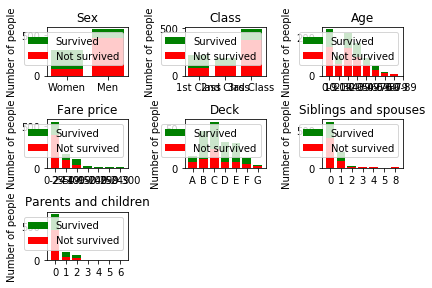

In [10]:
plt.figure()

plt.subplot(3,3,1)
plt.bar([0,1],surv,bottom=nsurv,label="Survived",color='g')
plt.bar([0,1],nsurv,label="Not survived",color='r')
plt.xticks([0,1],["Women","Men"])
plt.ylabel("Number of people")
plt.title("Sex")
plt.legend()

surv1=df_surv["Pclass"].value_counts().loc[1]
surv2=df_surv["Pclass"].value_counts().loc[2]
surv3=df_surv["Pclass"].value_counts().loc[3]
usurv1=df_notsurv["Pclass"].value_counts().loc[1]
usurv2=df_notsurv["Pclass"].value_counts().loc[2]
usurv3=df_notsurv["Pclass"].value_counts().loc[3]
surv_pclass=[surv1,surv2,surv3]
usurv_pclass=[usurv1,usurv2,usurv3]


plt.subplot(3,3,2)
plt.bar([0,1,2],surv_pclass,bottom=usurv_pclass,label="Survived",color='g')
plt.bar([0,1,2],usurv_pclass,label="Not survived",color='r')
plt.xticks([0,1,2],["1st Class","2nd Class","3rd Class"])
plt.ylabel("Number of people")
plt.title("Class")
plt.legend()



ages=df.groupby(["Survived","AgeGroup"]).count().reset_index().iloc[:,0:3]

plt.subplot(3,3,3)
plt.bar(np.arange(9),ages.loc[9:17,"PassengerId"],
        bottom=ages.loc[0:8,"PassengerId"],label="Survived",color='g')
plt.bar(np.arange(9),ages.loc[0:8,"PassengerId"],
        label="Not survived",color='r')
plt.xticks(range(0,9),ages.loc[0:8,"AgeGroup"])
plt.ylabel("Number of people")
plt.title("Age")
plt.legend()

fares=df.groupby(["Survived","FareGroup"]).count().reset_index().iloc[:,0:3]

plt.subplot(3,3,4)
plt.bar(np.arange(7),fares.loc[7:13,"PassengerId"],
        bottom=fares.loc[0:6,"PassengerId"],label="Survived",color='g')
plt.bar(np.arange(7),fares.loc[0:6,"PassengerId"],
        label="Not survived",color='r')
plt.xticks(range(0,7),fares.loc[0:6,"FareGroup"])
plt.ylabel("Number of people")
plt.title("Fare price")
plt.legend()

cabins=df.groupby(["Survived","Cabin_new"]).count().reset_index().iloc[:,0:3]

plt.subplot(3,3,5)
plt.bar(np.arange(7),cabins.loc[10:16,"PassengerId"],
        bottom=cabins.loc[1:7,"PassengerId"],label="Survived",color='g')
plt.bar(np.arange(7),cabins.loc[1:7,"PassengerId"],
        label="Not survived",color='r')
plt.xticks(range(0,7),cabins.loc[1:7,"Cabin_new"])
plt.ylabel("Number of people")
plt.title("Deck")
plt.legend()

sibsp=df.groupby(["Survived","SibSp"]).size()

plt.subplot(3,3,6)
plt.bar(np.arange(5),sibsp[1],bottom=sibsp[0][0:5],label="Survived",color='g')
plt.bar(np.arange(7),sibsp[0],
        label="Not survived",color='r')
plt.xticks(range(0,7),sibsp.index.get_level_values(1)[0:7])
plt.ylabel("Number of people")
plt.title("Siblings and spouses")
plt.legend()

parch=df.groupby(["Survived","Parch"]).size()

plt.subplot(3,3,7)
plt.bar(np.arange(5),parch[1],bottom=parch.loc[0,[0,1,2,3,5]],label="Survived",color='g')
plt.bar(np.arange(7),parch[0],label="Not survived",color='r')
plt.xticks(range(0,7),parch.index.get_level_values(1)[0:7])
plt.ylabel("Number of people")
plt.title("Parents and children")
plt.legend()

plt.tight_layout()

plt.show()

# Machine learning

In [12]:
features=["Sex","Age","Pclass","SibSp","Parch","Fare"]
features=["Age","Fare","Sex"]
features=["Sex","SibSp"]

labels=["Survived"]

X_train,X_test,y_train,y_test=train_test_split(df[features],df[labels])

clf=DecisionTreeClassifier()
clf.fit(X_train,y_train)
pred=clf.predict(X_test)
print features
print confusion_matrix(y_test,pred)
print accuracy_score(y_test,pred)

['Sex', 'SibSp']
[[129   8]
 [ 30  56]]
0.829596412556


# Visualize predictions

In [ ]:
X_test["Pred"]=pred
X_test["y"]=y_test

#sibsp2=X_test.groupby(["Pred","SibSp"]).size()
#sibsp3=X_test.groupby(["y","SibSp"]).size()
#sex2=X_test.groupby(["Pred","Sex"]).size()
#sex3=X_test.groupby(["y","Sex"]).size()


"""
plt.figure()

plt.subplot(2,2,1)
plt.bar(np.arange(len(sibsp2[1])),sibsp2[1],bottom=sibsp2[0][0:len(sibsp2[1])],label="Survived",color='b')
plt.bar(np.arange(len(sibsp2[0])),sibsp2[0],
        label="Not survived",color='cyan')
plt.xticks(range(0,len(sibsp2[0])),sibsp2.index.get_level_values(1)[0:len(sibsp2[0])])
plt.ylabel("Number of people")
plt.title("Prediction siblings and spouses")
plt.legend




plt.subplot(2,2,2)
plt.bar(np.arange(2),sex2[1],0.5,bottom=sex2[0],label="Survived",color='b')
plt.bar(np.arange(0.5,1.6,1),sex3[1],0.5,bottom=sex3[0],label="Survived",color='g')
plt.bar(np.arange(2),sex2[0],0.5,label="Not survived",color='cyan')
plt.bar(np.arange(0.5,1.6,1),sex3[0],0.5,label="Not survived",color='r')
plt.xticks(range(0,2),["Women","Men"])
plt.ylabel("Number of people")
plt.title("Prediction sex")
plt.legend


plt.show()
"""